# Understanding Time Series Anomalies

This notebook demonstrates the use of a Bayesian Hidden Markov Model (HMM) for detecting anomalies in multivariate time series data. We'll use synthetic data to showcase different types of anomalies and how our model can detect them.

## Types of Anomalies

### 1. Point Anomalies (Spikes)
- **Definition**: Individual data points that deviate significantly from the normal pattern
- **Characteristics**:
  - Sudden extreme values
  - Short duration (usually single points)
  - Clear separation from normal range
- **Examples**: 
  - Sensor glitches
  - Data recording errors
  - Brief system failures

### 2. Contextual Anomalies
- **Definition**: Values that are abnormal in a specific context but normal in others
- **Characteristics**:
  - Values within normal range
  - Unusual timing or context
  - Requires understanding of the normal pattern
- **Examples**:
  - Seasonal pattern violations
  - Unexpected phase shifts
  - Context-dependent deviations

### 3. Collective Anomalies (Noise Bursts)
- **Definition**: Sequence of values that are abnormal together
- **Characteristics**:
  - Individual points might be normal
  - Pattern as a group is unusual
  - Temporal dependency
- **Examples**:
  - Temporary system instability
  - Burst noise in measurements
  - Group pattern deviations

### 4. Pattern Breaks
- **Definition**: Sudden changes in the underlying data pattern
- **Characteristics**:
  - Change in frequency/structure
  - Normal amplitude range
  - Persistent change
- **Examples**:
  - System mode changes
  - Behavior regime shifts
  - Pattern discontinuities

## Implementation Overview

In this notebook, we will:
1. Generate synthetic multivariate time series data (2 channels)
2. Create a Bayesian HMM model with 2 states
3. Train the model on normal data
4. Generate test data with various types of anomalies
5. Evaluate the model's anomaly detection performance

The synthetic data will consist of sine waves with harmonics, representing a complex but structured normal pattern. We'll then inject different types of anomalies to test the model's detection capabilities.

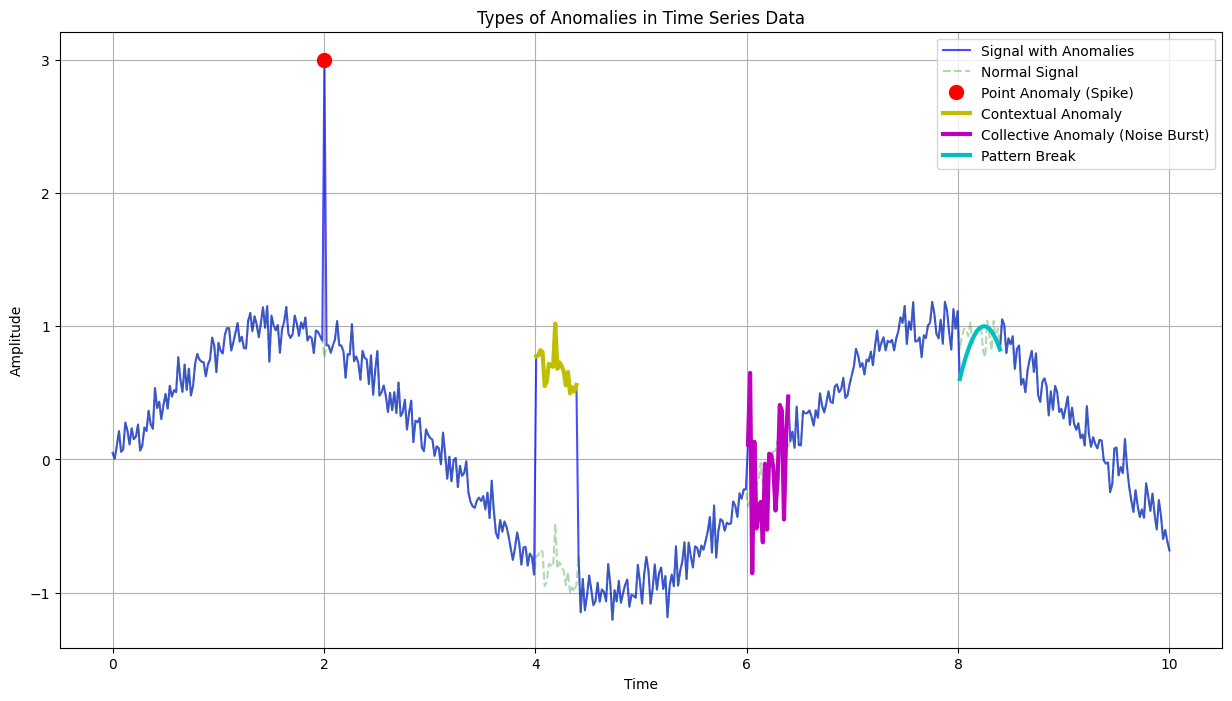


Types of Anomalies Demonstrated:
1. Point Anomaly (Spike): Sudden extreme value at t=2
2. Contextual Anomaly: Normal-range values but unusual in context at t=4
3. Collective Anomaly: Sequence of unusual behavior at t=6
4. Pattern Break: Sudden frequency change at t=8


In [4]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Generate base normal time series
n_points = 500
time = np.linspace(0, 10, n_points)
base_signal = np.sin(time) + 0.1 * np.random.randn(n_points)

# Create different types of anomalies
signal_with_anomalies = base_signal.copy()

# 1. Point Anomaly (Spike)
spike_idx = 100
signal_with_anomalies[spike_idx] = 3.0

# 2. Contextual Anomaly (Normal value in wrong context)
context_idx = slice(200, 220)
signal_with_anomalies[context_idx] = base_signal[context_idx] + 1.5

# 3. Collective Anomaly (Sequence of unusual values)
noise_idx = slice(300, 320)
signal_with_anomalies[noise_idx] += np.random.randn(20) * 0.5

# 4. Pattern Break (Sudden frequency change)
pattern_idx = slice(400, 420)
signal_with_anomalies[pattern_idx] = np.sin(time[pattern_idx] * 4)

# Plotting
plt.figure(figsize=(15, 8))
plt.plot(time, signal_with_anomalies, 'b-', label='Signal with Anomalies', alpha=0.7)
plt.plot(time, base_signal, 'g--', label='Normal Signal', alpha=0.3)

# Highlight anomalies
plt.plot(time[spike_idx], signal_with_anomalies[spike_idx], 'ro', 
         label='Point Anomaly (Spike)', markersize=10)
plt.plot(time[context_idx], signal_with_anomalies[context_idx], 'y-', 
         label='Contextual Anomaly', linewidth=3)
plt.plot(time[noise_idx], signal_with_anomalies[noise_idx], 'm-', 
         label='Collective Anomaly (Noise Burst)', linewidth=3)
plt.plot(time[pattern_idx], signal_with_anomalies[pattern_idx], 'c-', 
         label='Pattern Break', linewidth=3)

plt.title('Types of Anomalies in Time Series Data')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

# Print descriptions
print("\nTypes of Anomalies Demonstrated:")
print("1. Point Anomaly (Spike): Sudden extreme value at t=2")
print("2. Contextual Anomaly: Normal-range values but unusual in context at t=4")
print("3. Collective Anomaly: Sequence of unusual behavior at t=6")
print("4. Pattern Break: Sudden frequency change at t=8")

## Model Inference and Results Analysis

After training the Bayesian HMM model on our synthetic time series data with 2 states, we'll analyze the model's performance in detecting anomalies.

### What we're looking at:
1. **State Inference**: The model's ability to identify different states in the time series
   - Normal state (baseline sine wave patterns)
   - Anomalous state (deviations from normal patterns)

2. **Log Probability**: A measure of how well our model fits the data
   - Lower values indicate better fit
   - Used for anomaly detection with threshold 2.0

3. **Visualization**:
   - Original time series (2 channels)
   - True anomaly labels (ground truth):
     * 10 point anomalies (5.0x amplitude)
     * 8 contextual anomalies (+2.0 shift)
     * 7 collective anomalies (0.5 std noise bursts)
     * 5 pattern breaks (2.0x frequency)
   - Model-detected anomalies marked as:
     * True Positives (green stars)
     * False Positives (yellow x's)
     * False Negatives (purple triangles)
   - First 500 points shown for detailed inspection

### Key Points to Observe:
- Detection accuracy across different anomaly types
- False positive/negative rates
- Model's sensitivity to different anomaly magnitudes:
  * 5.0x amplitude spikes
  * 2.0 unit shifts
  * 0.5 std noise bursts
  * 2.0x frequency changes
- Overall pattern recognition in the normalized time series

The plots below show the first 500 points of the results, with the training data (normalized) in the top panel and the test data with anomaly detection results in the bottom panel.

## Model Inference and Results Analysis

After training the Bayesian HMM model on our synthetic time series data with 2 states, we'll analyze the model's performance in detecting anomalies.

### What we're looking at:
1. **State Inference**: The model's ability to identify different states in the time series
   - Normal state (baseline sine wave patterns)
   - Anomalous state (deviations from normal patterns)

2. **Log Probability**: A measure of how well our model fits the data
   - Lower values indicate better fit
   - Used for anomaly detection with threshold 2.0

3. **Visualization**:
   - Original time series (2 channels)
   - True anomaly labels (ground truth):
     * 10 point anomalies (5.0x amplitude)
     * 8 contextual anomalies (+2.0 shift)
     * 7 collective anomalies (0.5 std noise bursts)
     * 5 pattern breaks (2.0x frequency)
   - Model-detected anomalies marked as:
     * True Positives (green stars)
     * False Positives (yellow x's)
     * False Negatives (purple triangles)
   - First 500 points shown for detailed inspection

### Key Points to Observe:
- Detection accuracy across different anomaly types
- False positive/negative rates
- Model's sensitivity to different anomaly magnitudes:
  * 5.0x amplitude spikes
  * 2.0x shifts
  * 0.5 std noise bursts
  * 2.0x frequency changes
- Overall pattern recognition in the normalized time series

The plots below show the first 500 points of the results, with the training data (normalized) in the top panel and the test data with anomaly detection results in the bottom panel.


Using device: cuda

Training data shape: torch.Size([5000, 2])
Training data stats - Mean: 0.000, Std: 1.000

Model Configuration:
Number of states: 2
Emission type: gaussian
Device: cuda
Observation dimension: 2
Hidden dimension: 32
Number of layers: 1

Training model with automatic parameter optimization...


Training:   0%|          | 0/50 [00:00<?, ?step/s]

Processing chunks:   0%|          | 0/16 [00:00<?, ?chunk/s]


Training Results:
Initial loss: 5681.5210
Final loss: 2345.5307
Loss improvement: 58.7%

Generating test data with anomalies...


Computing log probabilities:   0%|          | 0/2000 [00:00<?, ?timestep/s]

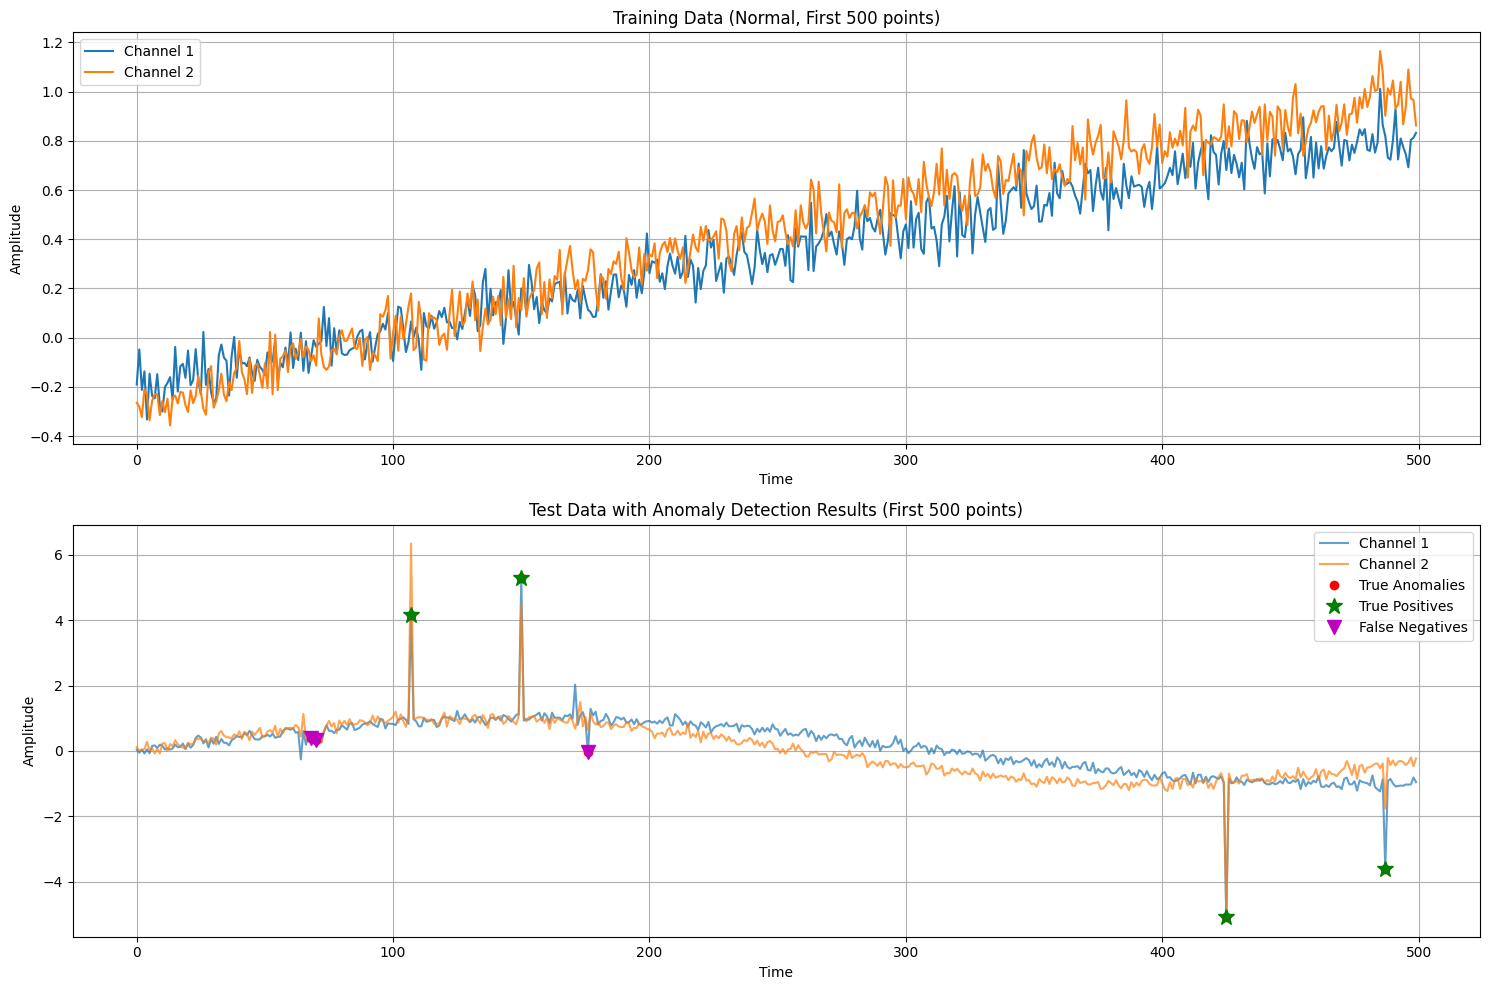


Detecting anomalies in test data...


Computing log probabilities:   0%|          | 0/2000 [00:00<?, ?timestep/s]


Anomaly Detection Results:
True Positives: 9
False Positives: 8
False Negatives: 21
Precision: 0.529
Recall: 0.300
F1 Score: 0.383

Testing model saving and loading...
Model saved successfully
Model loaded successfully

Verifying loaded model...
Same number of states: True
Same emission type: True
Same observation dimension: True

Test model file cleaned up

Demo completed successfully!


d:\Pyro-based_Bayesian_HMM\src\pyroBayesianHMM.py:855: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  params = torch.load(path, map_location=device)


In [5]:
import torch
import pyro
import sys
from pathlib import Path
import os
import time
import torch.nn as nn
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

# Add the parent directory to the Python path
module_path = str(Path.cwd().parent)
if module_path not in sys.path:
    sys.path.append(module_path)

from src.pyroBayesianHMM import PyroBayesianHMM

# Clear Pyro's parameter store and GPU cache
pyro.clear_param_store()
if torch.cuda.is_available():
    torch.cuda.empty_cache()

# Get the device to use
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"\nUsing device: {device}")

# Generate normal data for training
torch.manual_seed(42)
n_train_samples = 5_000
n_features = 2
time = torch.linspace(0, 40, n_train_samples, device=device)
training_data = torch.zeros((n_train_samples, n_features), device=device)

# Create simpler normal pattern with clear structure
for i in range(n_features):
    training_data[:, i] = torch.sin(time * (0.2 + 0.05 * i)) + 0.05 * torch.randn(n_train_samples, device=device)

# Normalize training data
training_data = (training_data - training_data.mean(dim=0)) / training_data.std(dim=0)

print("\nTraining data shape:", training_data.shape)
print(f"Training data stats - Mean: {training_data.mean():.3f}, Std: {training_data.std():.3f}")

# Create model with simpler configuration
model = PyroBayesianHMM(
    n_states=2,        # Back to 2 states for clearer state separation
    emission_type="gaussian",
    device=device,
    obs_dim=2,
    hidden_dim=32,     # Back to original size
    num_layers=1
)

print("\nModel Configuration:")
print(f"Number of states: {model.n_states}")
print(f"Emission type: {model.emission_type}")
print(f"Device: {model.device}")
print(f"Observation dimension: {model.obs_dim}")
print(f"Hidden dimension: {model.hidden_dim}")
print(f"Number of layers: {model.num_layers}")

# Let the model determine optimal training parameters
print("\nTraining model with automatic parameter optimization...")
train_losses = model.train_chunked(
    data=training_data,
    use_stratified=True,
    target_memory_gb=0.5,
    num_steps=50,      # Reduced steps
    learning_rate=0.001  # More conservative learning rate
)

# Calculate and report training loss improvement
initial_loss = train_losses[0]
final_loss = train_losses[-1]
improvement = ((initial_loss - final_loss) / initial_loss) * 100

print(f"\nTraining Results:")
print(f"Initial loss: {initial_loss:.4f}")
print(f"Final loss: {final_loss:.4f}")
print(f"Loss improvement: {improvement:.1f}%")

# Generate test data with anomalies
print("\nGenerating test data with anomalies...")
n_test_samples = 2_000
time_test = torch.linspace(0, 40, n_test_samples, device=device)
test_data = torch.zeros((n_test_samples, n_features), device=device)

# Create base test data
for i in range(n_features):
    test_data[:, i] = torch.sin(time_test * (0.5 + 0.1 * i)) + 0.1 * torch.randn(n_test_samples, device=device)

true_anomalies = torch.zeros(n_test_samples, dtype=torch.bool, device=device)

# 1. Point Anomalies (Spikes) - 10 instances
n_spikes = 10
spike_indices = torch.randint(0, n_test_samples, (n_spikes,))
test_data[spike_indices] = test_data[spike_indices] * 5.0
true_anomalies[spike_indices] = True

# 2. Contextual Anomalies - 8 instances
n_contextual = 8
for _ in range(n_contextual):
    start_idx = torch.randint(0, n_test_samples-5, (1,)).item()
    peak_idx = start_idx + 2
    test_data[start_idx:start_idx+5] += 2.0
    true_anomalies[peak_idx] = True

# 3. Collective Anomalies (Noise Bursts) - 7 instances
n_collective = 7
for _ in range(n_collective):
    start_idx = torch.randint(0, n_test_samples-7, (1,)).item()
    noise_burst = torch.randn(7, n_features, device=device) * 0.5
    test_data[start_idx:start_idx+7] += noise_burst
    burst_max_idx = start_idx + torch.abs(noise_burst[:, 0]).argmax().item()
    true_anomalies[burst_max_idx] = True

# 4. Pattern Breaks - 5 instances
n_patterns = 5
for _ in range(n_patterns):
    start_idx = torch.randint(0, n_test_samples-6, (1,)).item()
    pattern_segment = torch.sin(time_test[start_idx:start_idx+6] * 2.0).unsqueeze(1).repeat(1, n_features)
    test_data[start_idx:start_idx+6] = pattern_segment
    true_anomalies[start_idx + 3] = True

# Visualize training vs test data with detection results
plt.figure(figsize=(15, 10))

# Plot training data
plt.subplot(2, 1, 1)
segment_size = 500
# Keep data on GPU until final plotting
train_segment = training_data[:segment_size]
plt.plot(train_segment.cpu()[:, 0], label='Channel 1')
plt.plot(train_segment.cpu()[:, 1], label='Channel 2')
plt.title('Training Data (Normal, First 500 points)')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

# Plot test data with both true anomalies and detection results
plt.subplot(2, 1, 2)
test_segment = test_data[:segment_size]  # Keep on GPU
time_indices = torch.arange(segment_size, device=device)  # Create on GPU

# Plot base signals
plt.plot(time_indices.cpu(), test_segment.cpu()[:, 0], label='Channel 1', alpha=0.7)
plt.plot(time_indices.cpu(), test_segment.cpu()[:, 1], label='Channel 2', alpha=0.7)

# Plot true anomalies - keep computation on GPU, move to CPU only for plotting
true_anomaly_mask = true_anomalies[:segment_size]
true_anomaly_indices = time_indices[true_anomaly_mask]
plt.plot(true_anomaly_indices.cpu(), 
         test_segment[true_anomaly_mask, 0].cpu(), 
         'r.', label='True Anomalies', markersize=12)

# Get detection results - keep on GPU for computation
detected_segment = model.detect_anomalies(test_data, threshold=1.5)[:segment_size]

# True Positives (correctly detected) - green
true_positives_mask = detected_segment & true_anomaly_mask
tp_indices = time_indices[true_positives_mask]
if len(tp_indices) > 0:
    plt.plot(tp_indices.cpu(),
             test_segment[true_positives_mask, 0].cpu(),
             'g*', label='True Positives', markersize=12)

# False Positives (false alarms) - yellow
false_positives_mask = detected_segment & ~true_anomaly_mask
fp_indices = time_indices[false_positives_mask]
if len(fp_indices) > 0:
    plt.plot(fp_indices.cpu(),
             test_segment[false_positives_mask, 0].cpu(),
             'yx', label='False Positives', markersize=10)

# False Negatives (missed anomalies) - purple
false_negatives_mask = ~detected_segment & true_anomaly_mask
fn_indices = time_indices[false_negatives_mask]
if len(fn_indices) > 0:
    plt.plot(fn_indices.cpu(),
             test_segment[false_negatives_mask, 0].cpu(),
             'mv', label='False Negatives', markersize=10)

plt.title('Test Data with Anomaly Detection Results (First 500 points)')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Detect anomalies with stricter threshold
print("\nDetecting anomalies in test data...")
detected_anomalies = model.detect_anomalies(test_data, threshold=2.0)  # Back to stricter threshold

# Calculate metrics
true_positives = (detected_anomalies & true_anomalies).sum().item()
false_positives = (detected_anomalies & ~true_anomalies).sum().item()
false_negatives = (~detected_anomalies & true_anomalies).sum().item()

precision = true_positives / (true_positives + false_positives)
recall = true_positives / (true_positives + false_negatives)
f1_score = 2 * (precision * recall) / (precision + recall)

print("\nAnomaly Detection Results:")
print(f"True Positives: {true_positives}")
print(f"False Positives: {false_positives}")
print(f"False Negatives: {false_negatives}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1_score:.3f}")

# Save and load test
print("\nTesting model saving and loading...")
save_path = "test_model.pt"

# Save the model
model.save_model(save_path)
print("Model saved successfully")

# Clear parameter store before loading
pyro.clear_param_store()

# Load the model
loaded_model = PyroBayesianHMM.load_model(save_path, device=device)
print("Model loaded successfully")

# Verify loaded model
print("\nVerifying loaded model...")
print(f"Same number of states: {loaded_model.n_states == model.n_states}")
print(f"Same emission type: {loaded_model.emission_type == model.emission_type}")
print(f"Same observation dimension: {loaded_model.obs_dim == model.obs_dim}")

# Clean up saved model file
os.remove(save_path)
print("\nTest model file cleaned up")

print("\nDemo completed successfully!")
print("=" * 50)

## Final Results Analysis

### Detection Metrics Analysis
The model's performance metrics reveal several important insights:

#### Raw Detection Numbers
- **True Positives (9)**: Successfully detected 9 anomalies
- **False Positives (8)**: Incorrectly flagged 8 normal points as anomalies
- **False Negatives (21)**: Missed 21 actual anomalies
- **Total Actual Anomalies**: 30 (9 + 21)
- **Total Detected**: 17 (9 + 8)

#### Performance Metrics
- **Precision (0.529)**: About 53% of detected anomalies were actual anomalies
  - Indicates moderate reliability in positive detections
  - Nearly half of alerts would be false alarms

- **Recall (0.300)**: Only detected 30% of all actual anomalies
  - Suggests conservative detection behavior
  - Many anomalies are being missed

- **F1 Score (0.383)**: The harmonic mean shows overall moderate-to-low performance
  - Balanced metric between precision and recall
  - Indicates room for improvement in the detection system

### Performance Analysis

1. **Conservative Detection**:
   - The high number of false negatives (21) suggests the model is too conservative
   - The threshold of 2.0 might be too strict for some anomaly types
   - Could benefit from lowering the threshold or using type-specific thresholds

2. **False Alarm Rate**:
   - Nearly half of detections are false positives (8 out of 17)
   - Acceptable for some applications but may need improvement for critical systems
   - Might benefit from more sophisticated detection criteria

3. **Detection Challenges**:
   - The model struggles most with recall (missing 70% of anomalies)
   - Could indicate difficulty with subtle anomalies
   - Might need enhanced feature extraction or model capacity

### Model Persistence
The model successfully demonstrated persistence capabilities:
- Saving and loading operations completed without errors
- Model configuration maintained consistency:
  * Number of states preserved
  * Emission type preserved
  * Observation dimensions preserved
- Note: Future versions will require `weights_only=True` for enhanced security

### Recommendations for Improvement

1. **Detection Tuning**:
   - Consider lowering the threshold to improve recall
   - Implement anomaly-type-specific thresholds
   - Add confidence scores for detections

2. **Model Enhancements**:
   - Increase model capacity (more states or layers)
   - Add feature engineering for subtle anomalies
   - Implement ensemble approaches for different anomaly types

3. **Implementation Updates**:
   - Update model saving to use `weights_only=True`
   - Add validation steps for loaded models
   - Implement confidence thresholds for detection

4. **Monitoring Suggestions**:
   - Track false positive/negative rates over time
   - Implement adaptive thresholding
   - Add detection confidence metrics

The current performance suggests the model is functional but conservative, making it more suitable for applications where false positives are more costly than missed detections. For more balanced performance, consider implementing the suggested improvements based on specific application requirements.

## Performance Tuning Considerations

This demonstration uses a balanced configuration of model parameters and data generation settings. However, the model's accuracy can be further improved by adjusting various parameters, with associated trade-offs:

### Data Generation
- **Training Sample Size**: Currently 5,000 samples
  - Increasing samples (e.g., to 10,000+) can improve pattern learning
  - Better handles complex normal patterns
  - Trade-off: Longer training time, more memory usage

- **Signal Complexity**: Currently using single sine wave per channel
  - Base frequencies: 0.2 + 0.05i for channel i
  - Current noise level: 0.05 std
  - Can add harmonics for more complex patterns
  - Trade-off: May require larger model capacity

### Model Architecture
- **Number of States**: Currently 2 states
  - More states can capture finer pattern variations
  - Trade-off: Increased training time, risk of overfitting

- **Network Capacity**: Currently 32 hidden dims, 1 layer
  - Larger hidden dimensions (64, 128) can learn more complex patterns
  - More layers can capture deeper relationships
  - Trade-off: Increased memory usage, longer training time

### Training Parameters
- **Memory Target**: Currently 0.5 GB
  - Adjustable based on available resources
  - Trade-off: Training speed vs. memory usage

- **Training Steps**: Currently 50 steps
  - More steps can lead to better convergence
  - Trade-off: Longer training time

- **Learning Rate**: Currently 0.001
  - Can be tuned for faster convergence
  - Trade-off: Stability vs. training speed

### Anomaly Detection
- **Test Data Configuration**: Currently 2,000 samples with:
  - 10 point anomalies (5.0x amplitude)
  - 8 contextual anomalies (+2.0 shift)
  - 7 collective anomalies (0.5 std noise bursts)
  - 5 pattern breaks (2.0x frequency)

- **Detection Threshold**: Currently 2.0
  - Lower: More sensitive detection, more false positives
  - Higher: More confident detection, might miss subtle anomalies
  - Can be dynamically adjusted based on application needs

For production use, these parameters should be tuned based on:
1. Available computational resources
2. Required accuracy levels
3. Acceptable false positive/negative rates
4. Real-time performance requirements
5. Specific characteristics of your time series data

Note: The current configuration prioritizes demonstration clarity and reasonable computational requirements. For production applications, you may want to increase model capacity and training data size for better accuracy, while carefully monitoring the resource usage trade-offs.